<a href="https://colab.research.google.com/github/Ayubbett/Insurance-claim-amount-/blob/main/Zindi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load files
train = pd.read_csv('train.csv')
policies = pd.read_csv('policies.csv')
test = pd.read_csv('test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [ ]:
#Loading the train set
train.head(2)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.00000,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00000
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.00000,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24000


In [ ]:
# Preview policies dataset
policies.head(2)

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006


In [ ]:
#Previewing the test
test.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.00000,prod00005,ag00068,cob00009,rt00032,2021-03-11,ct0003,rf0001,pc0007,sc00029,br00004
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.00000,prod00015,ag00064,cob00034,rt00023,2020-06-25,ct0001,rf0003,pc0007,sc00022,br00002
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.00000,prod00012,ag00021,cob00016,rt00015,2019-03-14,ct0001,rf0001,pc0011,sc00049,br00001
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.00000,prod00002,ag00037,cob00002,rt00002,2018-12-04,ct0001,rf0002,pc0002,sc00012,br00005
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.00000,prod00015,ag00037,cob00034,rt00023,2019-09-18,ct0001,rf0003,pc0007,sc00022,br00002


In [ ]:
# Preview sample submission file
samplesubmission.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,0
1,ID_GTE9ZUJ9GZ97,0
2,ID_RUVIYRKWZ4RG,0
3,ID_J81X8SWU6JYN,0
4,ID_94NM3JJAWWOQ,0


In [ ]:
# Check size and shape of datasets
print("Train shape is", train.shape)
print("Policies shape is", policies.shape)
print("testshape is", test.shape)
print("sample submission is", samplesubmission.shape)

Train shape is (9376, 15)
Policies shape is (30371, 10)
testshape is (4019, 14)
sample submission is (4019, 2)


In [ ]:
#Merging the policies dataframe with the train dataframe
train_df  = pd.merge(train,policies)
train_df.head(2)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,product_code,trans_date,from_date,to_date
0,ID_SHWOLB04CA2O,pol000010764,claim0013134,7000.00000,prod00005,ag00044,cob00009,rt00032,2019-04-21,ct0003,rf0002,pc0007,sc00004,br00009,1637.73000,prod00005,2018-09-20 18:08:58.993,2018-09-20 00:00:00.000,2019-05-31 00:00:00.000
1,ID_TWDB1RP1CGO7,pol000009336,claim0010388,12600.00000,prod00005,ag00226,cob00009,rt00032,2018-12-21,ct0003,rf0001,pc0007,sc00004,br00001,440.00000,prod00005,2018-08-22 13:08:34.247,2018-08-22 00:00:00.000,2018-12-31 00:00:00.000


In [ ]:
#Finding the number of null values
train_df.isnull().any()

claim_id             False
policy_number        False
claim_number         False
sum_insured          False
product              False
agent                False
class_of_business    False
risk_type            False
loss_date            False
client_type          False
renewal_frequency    False
primary_cause        False
secondary_cause      False
branch               False
target               False
product_code         False
trans_date           False
from_date            False
to_date              False
dtype: bool

In [ ]:
# Check for duplicates
train_df.duplicated().any()

False

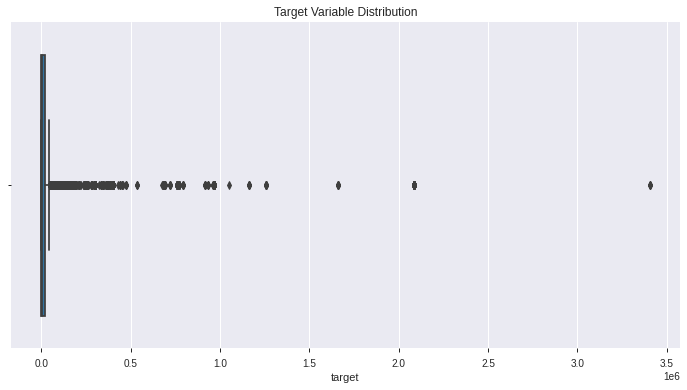

In [ ]:
# A box plot showing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(train_df.target)
plt.title('Target Variable Distribution');

In [ ]:
#Detection of outliers
# IQR
Q1 = np.percentile(train_df['target'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train_df['target'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", train_df.shape)

# Upper bound
upper = np.where(train_df['target'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train_df['target'] <= (Q1-1.5*IQR))
 
#Removing the Outliers
train_df.drop(upper[0], inplace = True)
train_df.drop(lower[0], inplace = True)
 
print("New Shape: ", train_df.shape)

Old Shape:  (9814, 19)
New Shape:  (8123, 19)


In [ ]:
# Train dataset datatypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 0 to 9813
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           8123 non-null   object 
 1   policy_number      8123 non-null   object 
 2   claim_number       8123 non-null   object 
 3   sum_insured        8123 non-null   float64
 4   product            8123 non-null   object 
 5   agent              8123 non-null   object 
 6   class_of_business  8123 non-null   object 
 7   risk_type          8123 non-null   object 
 8   loss_date          8123 non-null   object 
 9   client_type        8123 non-null   object 
 10  renewal_frequency  8123 non-null   object 
 11  primary_cause      8123 non-null   object 
 12  secondary_cause    8123 non-null   object 
 13  branch             8123 non-null   object 
 14  target             8123 non-null   float64
 15  product_code       8123 non-null   object 
 16  trans_date         8123 

In [ ]:
train_df.head(2)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,product_code,trans_date,from_date,to_date
0,ID_SHWOLB04CA2O,pol000010764,claim0013134,7000.00000,prod00005,ag00044,cob00009,rt00032,2019-04-21,ct0003,rf0002,pc0007,sc00004,br00009,1637.73000,prod00005,2018-09-20 18:08:58.993,2018-09-20 00:00:00.000,2019-05-31 00:00:00.000
1,ID_TWDB1RP1CGO7,pol000009336,claim0010388,12600.00000,prod00005,ag00226,cob00009,rt00032,2018-12-21,ct0003,rf0001,pc0007,sc00004,br00001,440.00000,prod00005,2018-08-22 13:08:34.247,2018-08-22 00:00:00.000,2018-12-31 00:00:00.000


In [ ]:
#Dropping unnecessary columns
train_df.drop(['product_code','trans_date', 'from_date', 'to_date'], axis = 1, inplace = True)

In [ ]:
# Convert datetime variables to datetime objects
train_df.loss_date = pd.to_datetime(train_df.loss_date, errors='coerce')

# Confirm that the dates have been converted successfully 
train_df.loss_date.describe()

count                    8123
unique                    801
top       2021-04-15 00:00:00
freq                       54
first     2018-01-01 00:00:00
last      2021-10-13 00:00:00
Name: loss_date, dtype: object

In [ ]:
# Convert categorical variables to categorical objects
cat_cols = train_df.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).tolist()

# Preview categorical variables
train_df[cat_cols].head()

,agent,branch,claim_number,class_of_business,client_type,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause
0,ag00044,br00009,claim0013134,cob00009,ct0003,pol000010764,pc0007,prod00005,rf0002,rt00032,sc00004
1,ag00226,br00001,claim0010388,cob00009,ct0003,pol000009336,pc0007,prod00005,rf0001,rt00032,sc00004
2,ag00226,br00001,claim0007509,cob00034,ct0001,pol000007786,pc0007,prod00015,rf0002,rt00023,sc00023
3,ag00226,br00001,claim0007509,cob00034,ct0001,pol000007786,pc0007,prod00015,rf0002,rt00023,sc00023
4,ag00226,br00001,claim0007509,cob00034,ct0001,pol000007786,pc0007,prod00015,rf0002,rt00023,sc00023


In [ ]:
# Fill in missing values in categorical variables with the most common
train_df[cat_cols] = train_df[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  train_df[col] = train_df[col].astype('category')

# Confirm
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 0 to 9813
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           8123 non-null   object        
 1   policy_number      8123 non-null   category      
 2   claim_number       8123 non-null   category      
 3   sum_insured        8123 non-null   float64       
 4   product            8123 non-null   category      
 5   agent              8123 non-null   category      
 6   class_of_business  8123 non-null   category      
 7   risk_type          8123 non-null   category      
 8   loss_date          8123 non-null   datetime64[ns]
 9   client_type        8123 non-null   category      
 10  renewal_frequency  8123 non-null   category      
 11  primary_cause      8123 non-null   category      
 12  secondary_cause    8123 non-null   category      
 13  branch             8123 non-null   category      
 14  target  

In [ ]:
# Extract day, month and year from the loss date column
# day
train_df['loss_date_day'] = train_df.loss_date.dt.day

# month
train_df['loss_date_month'] = train_df.loss_date.dt.month
 
# year
train_df['loss_date_year'] = train_df.loss_date.dt.year

# Preview engineered date features
train_df[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()

,loss_date,loss_date_day,loss_date_month,loss_date_year
0,2019-04-21,21,4,2019
1,2018-12-21,21,12,2018
2,2018-10-31,31,10,2018
3,2018-10-31,31,10,2018
4,2018-10-31,31,10,2018


In [ ]:
# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  train_df[col] = le.fit_transform(train_df[col])

# Preview engineered train dataset
train_df.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,loss_date_day,loss_date_month,loss_date_year
0,ID_SHWOLB04CA2O,860,1439,7000.00000,2,2,6,20,2019-04-21,2,1,5,2,7,1637.73000,21,4,2019
1,ID_TWDB1RP1CGO7,645,1110,12600.00000,2,7,6,20,2018-12-21,2,0,5,2,0,440.00000,21,12,2018
2,ID_5O1OQUH5JZOK,199,418,8000.00000,9,7,19,14,2018-10-31,0,1,5,17,0,29367.09000,31,10,2018
3,ID_5O1OQUH5JZOK,199,418,8000.00000,9,7,19,14,2018-10-31,0,1,5,17,0,29367.09000,31,10,2018
4,ID_5O1OQUH5JZOK,199,418,8000.00000,9,7,19,14,2018-10-31,0,1,5,17,0,29367.09000,31,10,2018


##  Preprocess test dataset

In [ ]:
# Convert datetime variables to datetime objects
test.loss_date = pd.to_datetime(test.loss_date, errors='coerce')

# Fill in missing values in categorical variables with the most common
test[cat_cols] = test[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  test[col] = test[col].astype('category')

# Extract day, month and year from the loss date column
test['loss_date_day'] = test.loss_date.dt.day #day

test['loss_date_month'] = test.loss_date.dt.month #month
 
test['loss_date_year'] = test.loss_date.dt.year #year

# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  test[col] = le.fit_transform(test[col])

# Preview engineered test dataset
test.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,loss_date_day,loss_date_month,loss_date_year
0,ID_4RO0KZI9BBW2,739,1667,300000.00000,4,4,8,29,2021-03-11,2,0,6,26,3,11,3,2021
1,ID_GTE9ZUJ9GZ97,312,883,2700000.00000,12,3,28,20,2020-06-25,0,2,6,20,1,25,6,2020
2,ID_RUVIYRKWZ4RG,917,1895,4071352.00000,10,0,14,14,2019-03-14,0,0,9,43,0,14,3,2019
3,ID_J81X8SWU6JYN,2081,3852,0.00000,1,1,1,1,2018-12-04,0,1,1,10,4,4,12,2018
4,ID_94NM3JJAWWOQ,257,507,1607178.00000,12,1,28,20,2019-09-18,0,2,6,20,1,18,9,2019


In [ ]:
pip install Boruta

     |████████████████████████████████| 56 kB 3.9 MB/s 


In [ ]:
#Importing Boruta and other required libraries. 

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
#Loading the dataset, separating the features from the target variable, and 
#splitting the data into a train and a test set.

X1 =train_df.drop(['claim_id', 'loss_date','target'], axis = 1)
y1 = train_df['target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = .3, random_state = 0)

In [ ]:
#Creating a baseline RandomForrestClassifier model with all the features.

rf_all_features = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=5)
rf_all_features.fit(X1_train, y1_train) 

mean_absolute_error(y1_test, rf_all_features.predict(X1_test))

3934.7666600253087

In [ ]:
#Creating a BorutaPy object with RandomForestClassifier as the estimator and ranking the features. 
rfc = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=0)
boruta_selector.fit(np.array(X1_train), np.array(y1_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
Iteration: 	16 / 100
Confirmed: 	12
Tentative: 	3
Rejected: 	0
I

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=105,
                                         random_state=RandomState(MT19937) at 0x7F3E1D7026B0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F3E1D7026B0, verbose=2)

In [ ]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [1 1 1 3 1 1 1 1 1 1 1 2 1 1 1]
No. of significant features:  13


In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(X1_train.columns),
                                       'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,policy_number,1
1,claim_number,1
2,sum_insured,1
4,agent,1
5,class_of_business,1
6,risk_type,1
7,client_type,1
8,renewal_frequency,1
9,primary_cause,1
10,secondary_cause,1


## MOdelling

In [ ]:
train_df.columns

Index(['claim_id', 'policy_number', 'claim_number', 'sum_insured', 'product',
       'agent', 'class_of_business', 'risk_type', 'loss_date', 'client_type',
       'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch',
       'target', 'loss_date_day', 'loss_date_month', 'loss_date_year'],
      dtype='object')

In [ ]:
# Select main columns to be used in training
main_cols = train_df.columns.difference(['claim_id', 'loss_date', 'branch', 'product', 'target']).tolist()
X = train_df[main_cols]
y = train_df.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
X.dtypes

agent                  int64
claim_number           int64
class_of_business      int64
client_type            int64
loss_date_day          int64
loss_date_month        int64
loss_date_year         int64
policy_number          int64
primary_cause          int64
renewal_frequency      int64
risk_type              int64
secondary_cause        int64
sum_insured          float64
dtype: object

## Cat Boost

In [ ]:
#List of categorical columns
categoricalcolumns = X.columns.difference(['sum_insured']).tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  ['agent', 'claim_number', 'class_of_business', 'client_type', 'loss_date_day', 'loss_date_month', 'loss_date_year', 'policy_number', 'primary_cause', 'renewal_frequency', 'risk_type', 'secondary_cause']
Location of categorical columns :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
pip install catboost

     |████████████████████████████████| 76.1 MB 1.1 MB/s 


In [ ]:
# importing Pool
from catboost import CatBoostRegressor
from catboost import Pool
#Creating pool object for train dataset.
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
#Creating pool object for test dataset
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [ ]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE')
# Fit model 
cat_model.fit( X_train, y_train,
               eval_set=(X_test, y_test),
               plot=True
              )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.066896
0:	learn: 8399.1767137	test: 8698.7418107	best: 8698.7418107 (0)	total: 48.6ms	remaining: 48.5s
1:	learn: 8223.8900988	test: 8520.1673399	best: 8520.1673399 (1)	total: 51.1ms	remaining: 25.5s
2:	learn: 8063.2788844	test: 8373.3932656	best: 8373.3932656 (2)	total: 53.5ms	remaining: 17.8s
3:	learn: 7935.3790560	test: 8253.4669115	best: 8253.4669115 (3)	total: 55.8ms	remaining: 13.9s
4:	learn: 7809.8775480	test: 8129.0709874	best: 8129.0709874 (4)	total: 58.2ms	remaining: 11.6s
5:	learn: 7678.0566927	test: 8004.6894044	best: 8004.6894044 (5)	total: 60.7ms	remaining: 10.1s
6:	learn: 7552.9522168	test: 7891.4076840	best: 7891.4076840 (6)	total: 63.2ms	remaining: 8.96s
7:	learn: 7442.9507619	test: 7791.0683969	best: 7791.0683969 (7)	total: 65.6ms	remaining: 8.13s
8:	learn: 7349.5379922	test: 7701.8546292	best: 7701.8546292 (8)	total: 68ms	remaining: 7.49s
9:	learn: 7259.1391865	test: 7626.0890465	best: 7626.0890465 (9)	total: 70.3ms	remaining: 6.96s
10:	learn: 7

In [ ]:
y_predict_cat= cat_model.predict(X_test)

In [ ]:
#Finding the accuracy scores 
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_predict_cat))

MAE 1209.5457683285595


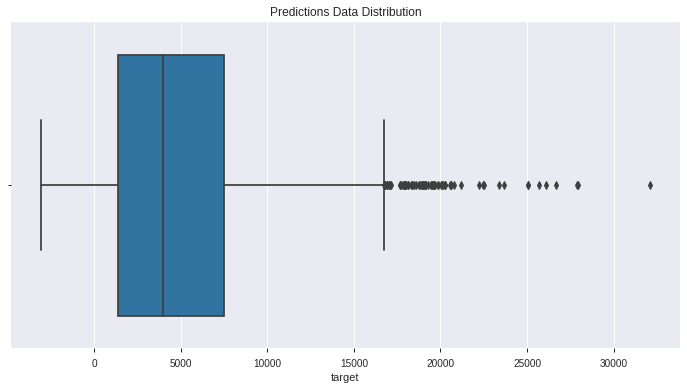

In [ ]:
# Make prediction on the test set
test_df = test[main_cols]
predictions_cat = cat_model.predict(test_df)

# # Create a submission file
sub_file_7 = samplesubmission.copy()
sub_file_7.target = predictions_cat

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file_7.target)
plt.title('Predictions Data Distribution');

In [ ]:
# Preview the sub_file
sub_file_7.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,9228.80851
1,ID_GTE9ZUJ9GZ97,5893.41708
2,ID_RUVIYRKWZ4RG,2002.20100
3,ID_J81X8SWU6JYN,-193.66683
4,ID_94NM3JJAWWOQ,5582.30263


In [ ]:
# Write to csv file to submit to Zindi
sub_file_7.to_csv("CCI_7.csv", index = False)

## Random Forest Regressor

In [ ]:
# Finding the best parameters.
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
params = {'bootstrap': [True, False],
 'max_depth': [5, 10, 15],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 "n_estimators":[100,500]
}

grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           cv=3, n_jobs=1, verbose=1, scoring = "neg_mean_absolute_error")

In [ ]:
# Fitting grid search
best_clf = grid_search.fit(X_train, y_train)

print('Best bootstrap:', best_clf.best_estimator_.get_params()['bootstrap'])
print('Best min_samples_leaf:', best_clf.best_estimator_.get_params()['min_samples_leaf'])
print('Best Max_depth:', best_clf.best_estimator_.get_params()['max_depth'])
print('Best max_features:', best_clf.best_estimator_.get_params()['max_features'])
print('Best n_estimators:', best_clf.best_estimator_.get_params()['n_estimators'])
print('best_score',best_clf.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best bootstrap: False
Best min_samples_leaf: 1
Best Max_depth: 15
Best max_features: sqrt
Best n_estimators: 500
best_score -881.8691199505589


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Initiating the random forest regressor:
Forest = RandomForestRegressor(n_estimators = 500,min_samples_leaf = 1, random_state=0, max_depth=15)

#Fitting the model:
Forest.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred_for = Forest.predict(X_test)

In [ ]:
#Finding the accuracy scores 
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred_for))

MAE 932.8859418440735


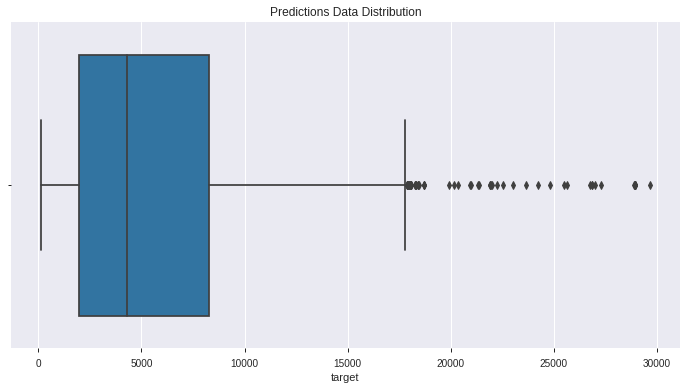

In [ ]:
# Make prediction on the test set
test_df = test[main_cols]
predictions = Forest.predict(test_df)

# # Create a submission file
sub_file_6 = samplesubmission.copy()
sub_file_6.target = predictions

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file_6.target)
plt.title('Predictions Data Distribution');

In [ ]:
# Preview the sub_file
sub_file_6.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,3942.16610
1,ID_GTE9ZUJ9GZ97,5565.52266
2,ID_RUVIYRKWZ4RG,3879.14316
3,ID_J81X8SWU6JYN,574.59093
4,ID_94NM3JJAWWOQ,6592.53982


In [ ]:
# Write to csv file to submit to Zindi
sub_file_6.to_csv("CCI_6.csv", index = False)

## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel = 'rbf')

#Fitting the model:
sv_regressor.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred_svr = sv_regressor.predict(X_test)

In [ ]:
#Finding the accuracy scores 
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred_svr))

MAE 5093.0306295820665


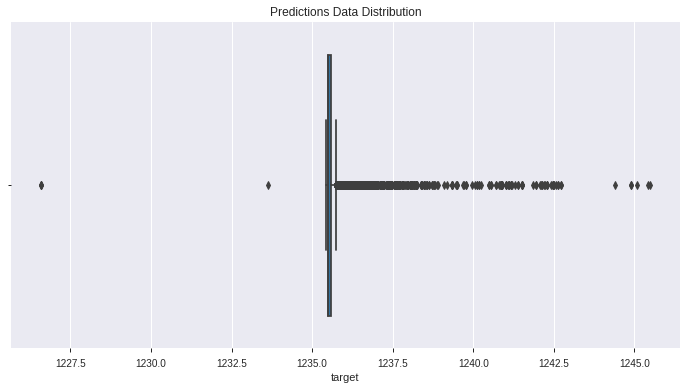

In [ ]:
# Make prediction on the test set
test_df = test[main_cols]
predictions = sv_regressor.predict(test_df)

# # Create a submission file
sub_file_8 = samplesubmission.copy()
sub_file_8.target = predictions

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file_8.target)
plt.title('Predictions Data Distribution');

## Light GBM

In [ ]:
#parameter tuning
from lightgbm import LGBMRegressor
lg = LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [100,200]
             }
search = GridSearchCV(estimator=lg, n_jobs=-1, param_grid=param_dist, cv = 10, scoring="neg_mean_squared_error", verbose=5)

In [ ]:
#finding the best parametres
search.fit(X_train,y_train)
print(search.best_params_)
abs(search.best_score_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
{'learning_rate': 0.1, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 300}


3436479.692139213

In [ ]:
import lightgbm as lgb
lgbm_model = lgb.LGBMRegressor(learning_rate=0.1, max_depth=25, n_estimators = 200, num_leaves = 300, random_state=0)
lgbm_model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='neg_mean_absolute_error')

[20]	training's l2: 8.94144e+06	valid_0's l2: 1.54945e+07
[40]	training's l2: 3.53078e+06	valid_0's l2: 9.178e+06
[60]	training's l2: 1.87234e+06	valid_0's l2: 6.8896e+06
[80]	training's l2: 1.18014e+06	valid_0's l2: 5.93435e+06
[100]	training's l2: 791707	valid_0's l2: 5.38188e+06
[120]	training's l2: 563745	valid_0's l2: 5.04142e+06
[140]	training's l2: 415566	valid_0's l2: 4.8344e+06
[160]	training's l2: 318528	valid_0's l2: 4.68487e+06
[180]	training's l2: 248563	valid_0's l2: 4.58188e+06
[200]	training's l2: 198150	valid_0's l2: 4.53668e+06


LGBMRegressor(max_depth=25, n_estimators=200, num_leaves=300, random_state=0)

In [ ]:
#Creating a prediction from the model
y_pred_lgbm = lgbm_model.predict(X_test)

#Finding its accuracy scores
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred_lgbm))

MAE 500.0834372638611


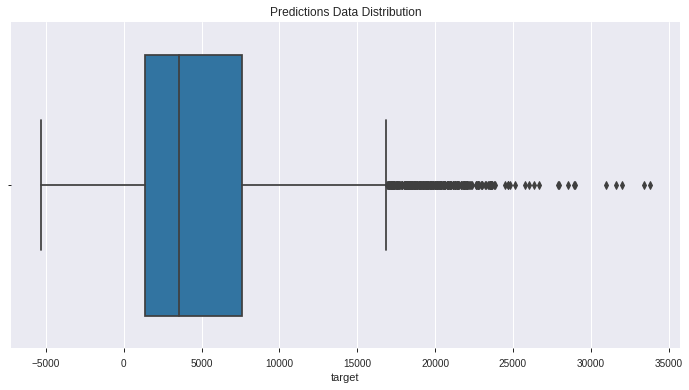

In [ ]:
# Make prediction on the test set
test_df = test[main_cols]
predictions = lgbm_model.predict(test_df)

# # Create a submission file
sub_file_9 = samplesubmission.copy()
sub_file_9.target = predictions

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file_9.target)
plt.title('Predictions Data Distribution');

In [ ]:
# Preview the sub_file
sub_file_9.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,4858.95823
1,ID_GTE9ZUJ9GZ97,12159.57352
2,ID_RUVIYRKWZ4RG,6721.63245
3,ID_J81X8SWU6JYN,-4232.27530
4,ID_94NM3JJAWWOQ,7134.14667


In [ ]:
# Write to csv file to submit to Zindi
sub_file_9.to_csv("CCI_9.csv", index = False)

MLP

In [ ]:
from sklearn.neural_network import MLPRegressor